In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Набор данных взят с https://www.kaggle.com/aashi20/top-50-spotify-songs
# Top-50 песен в Spotify в 2019 году.
url=("/content/drive/My Drive/Colab Notebooks/ТАСКИ/Новые праки/Notebook_For_AI_Main-master/2021 Осенний семестр/datasets/top50.csv")
data = pd.read_csv(url)
data


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [7]:
new_data = pd.DataFrame()
d = pd.get_dummies(data['Genre'])
new_data = pd.concat([new_data, d])
new_data.head()


,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


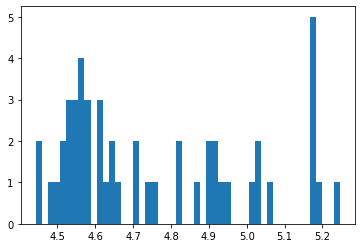

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136


In [8]:
d = data['Beats.Per.Minute']
plt.hist(np.log(d), bins=50)
plt.show()
d = np.array(np.log(d)).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Beats.Per.Minute'] = d
new_data.head(10)

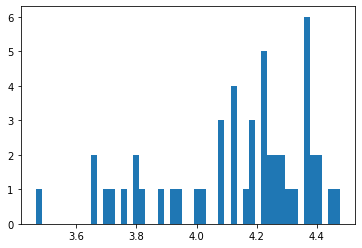

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076


In [9]:
d = data['Energy']
plt.hist(np.log(d), bins=50)
plt.show()
d = np.array(np.log(d)).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Energy'] = d
new_data.head(10)

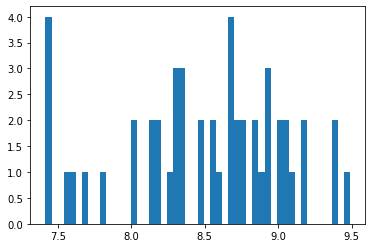

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991


In [10]:
d = data['Danceability']
d = np.clip(d, 55, 100)
plt.hist(d**0.5, bins=50)
plt.show()
d = np.array(d**0.5).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Danceability'] = d
new_data.head(10)

In [11]:
d = data['Loudness..dB..']
d = np.clip(d, -10, 0)
d = np.array(d).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Loudness..dB..'] = d
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599,0.500
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891,0.750
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943,0.250
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383,0.750
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974,0.625
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809,0.500
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000,0.625
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807,0.500
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991,0.000


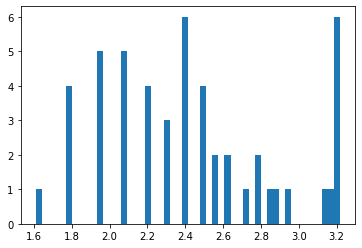

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599,0.500,0.292030
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891,0.750,0.292030
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943,0.250,0.292030
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383,0.750,0.489896
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974,0.625,0.365212
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809,0.500,0.209062
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000,0.625,0.292030
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807,0.500,0.489896
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991,0.000,0.430677


In [12]:
d = data['Liveness']
d = np.clip(d, 0, 25)
plt.hist(np.log(d), bins=50)
plt.show()
d = np.array(np.log(d)).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Liveness'] = d
new_data.head(10)

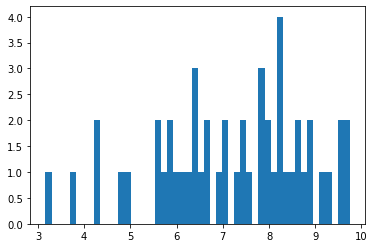

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599,0.500,0.292030,0.834986
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891,0.750,0.292030,0.705894
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943,0.250,0.292030,0.646049
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383,0.750,0.489896,0.164076
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974,0.625,0.365212,0.911665
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809,0.500,0.209062,0.248090
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000,0.625,0.292030,0.418224
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807,0.500,0.489896,0.734712
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991,0.000,0.430677,0.656242


In [13]:
d = data['Valence.']
plt.hist(d**0.5, bins=50)
plt.show()
d = np.array(d**0.5).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Valence.'] = d
new_data.head(10)

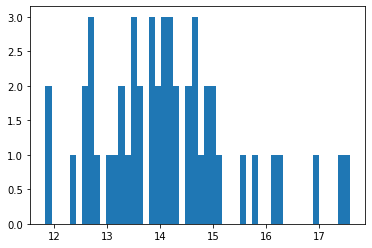

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599,0.500,0.292030,0.834986,0.345986
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891,0.750,0.292030,0.705894,0.965151
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943,0.250,0.292030,0.646049,0.389662
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383,0.750,0.489896,0.164076,0.243046
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974,0.625,0.365212,0.911665,0.522122
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809,0.500,0.209062,0.248090,0.000000
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000,0.625,0.292030,0.418224,0.414273
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807,0.500,0.489896,0.734712,0.121437
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991,0.000,0.430677,0.656242,0.364800


In [14]:
d = data['Length.']
d = np.clip(d, 140, 500)
plt.hist(d**0.5, bins=50)
plt.show()
d = np.array(d**0.5).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Length.'] = d
new_data.head(10)

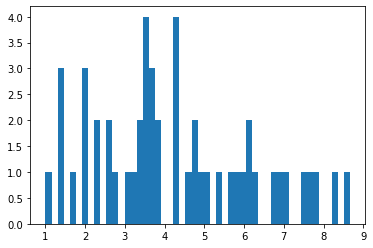

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599,0.500,0.292030,0.834986,0.345986,0.130544
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891,0.750,0.292030,0.705894,0.965151,0.238690
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297,0.321674
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943,0.250,0.292030,0.646049,0.389662,0.321674
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383,0.750,0.489896,0.164076,0.243046,0.745172
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974,0.625,0.365212,0.911665,0.522122,0.261088
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809,0.500,0.209062,0.248090,0.000000,0.054073
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000,0.625,0.292030,0.418224,0.414273,0.375051
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807,0.500,0.489896,0.734712,0.121437,0.161361
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991,0.000,0.430677,0.656242,0.364800,0.619374


In [15]:
d = data['Acousticness..']
plt.hist(d**0.5, bins=50)
plt.show()
d = np.array(d**0.5).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Acousticness..'] = d
new_data.head(10)

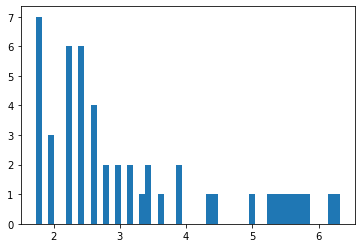

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,edm,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.397232,0.535386,0.628599,0.500,0.292030,0.834986,0.345986,0.130544,0.000000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.262700,0.918063,0.710891,0.750,0.292030,0.705894,0.965151,0.238690,0.276091
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297,0.321674,1.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.111824,0.700525,0.281943,0.250,0.292030,0.646049,0.389662,0.321674,0.571986
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.706120,0.700525,0.096383,0.750,0.489896,0.164076,0.243046,0.745172,0.198955
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.226663,0.745128,0.737974,0.625,0.365212,0.911665,0.522122,0.261088,0.058345
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.932783,0.685198,0.600809,0.500,0.209062,0.248090,0.000000,0.054073,0.795451
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.331785,0.745128,0.000000,0.625,0.292030,0.418224,0.414273,0.375051,0.276091
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584311,0.653814,0.948807,0.500,0.489896,0.734712,0.121437,0.161361,0.311426
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575136,0.292076,0.458991,0.000,0.430677,0.656242,0.364800,0.619374,0.965130


In [16]:
d = data['Speechiness.']
d = np.clip(d, 0, 40)
plt.hist(d**0.5, bins=50)
plt.show()
d = np.array(d**0.5).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Speechiness.'] = d
new_data.head(10)

In [ ]:
d = data['Popularity']
d = np.clip(d, 77, 100)
plt.hist(d**0.5, bins=50)
plt.show()
d = np.array(d**0.5).reshape(-1, 1)
d = MinMaxScaler().fit_transform(d).flatten()
new_data['Popularity'] = d
new_data.head(10)